In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import itertools as it

In [2]:
def func1(phi,l,lamb):
    
    part1=(lamb-np.cos(phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))
    
    return part1*np.cos(l*phi)/np.pi

def func2(phi,l,lamb):
    
    part2=(np.sin(phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))
    
    return -part2*np.sin(l*phi)/np.pi

def gfunc(l,lamb):
    
    integ1=integrate.quad(func1,0,np.pi,args=(l,lamb))
    integ2=integrate.quad(func2,0,np.pi,args=(l,lamb))
    
    return integ1[0]-integ2[0]
def g_s(lambdas):

    g={}
    for n in range(-L,L): 
        for l in lambdas:
            g[n,l]=gfunc(n,l)
    return g

def assign_g(a,b,g,lamb):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return 1j*g[(d-1)//2,lamb]
        elif a%2==0:
            
            return -1j*g[-((d+1)//2),lamb]
    else:
        return 0
    
def assign_g_debug(a,b):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return "ig[{}]".format((d-1)//2)
        elif a%2==0:
            
            return "-ig[{}]".format(-(d+1)//2)
    else:
        return 0

def get_mat(gdic,lam):
    mat = [[None for c in range(1,2*L+1)] for r in range(1,2*L+1)]
    for x in range(1,2*L+1):
        for y in range(1,2*L+1):
            mat[x-1][y-1]=assign_g(x,y,gdic,lam)  
    return np.array(mat)

In [3]:
L=3
lambdarange=np.linspace(0.1,2,500)

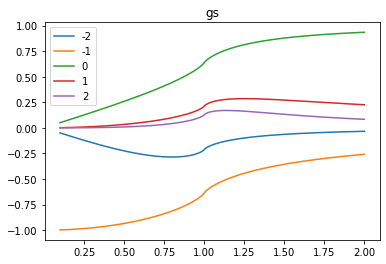

In [4]:
fig,ax=plt.subplots()
for size in range(-L+1,L):
    temp_vec=np.zeros_like(lambdarange)
    for i,lam in enumerate(lambdarange):
        temp_vec[i]=gfunc(size,lam)
    ax.plot(lambdarange,temp_vec,label=size)
plt.title("gs")
plt.legend()
plt.show()

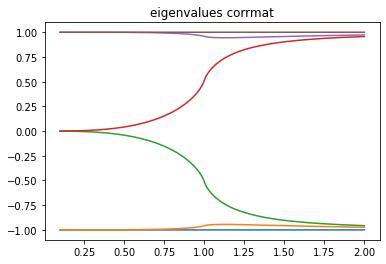

In [5]:
gdic=g_s(lambdarange)
autov={}
for i,x in enumerate(lambdarange):
    matr=get_mat(gdic,x)
    autov[i]=eigvalsh(matr)
    
autovals=np.array([autov[i] for i in autov])
plt.plot(lambdarange,autovals)
plt.title("eigenvalues corrmat")
plt.show()
#questi sono nu1,nu2,-nu2,-nu1

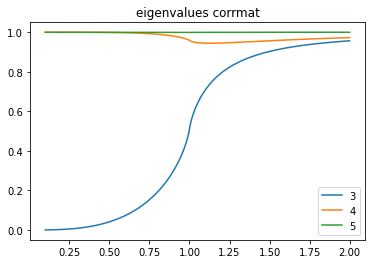

In [10]:
gdic=g_s(lambdarange)
autov={}
for i,x in enumerate(lambdarange):
    matr=get_mat(gdic,x)
    autov[i]=eigvalsh(matr)
    
autovals=np.array([autov[i] for i in autov])
for k in range(L,2*L):
    plt.plot(lambdarange,autovals[:,k],label=k)
plt.title("eigenvalues corrmat")
plt.legend()
plt.show()

Text(0.5, 0.98, '3 site theo')

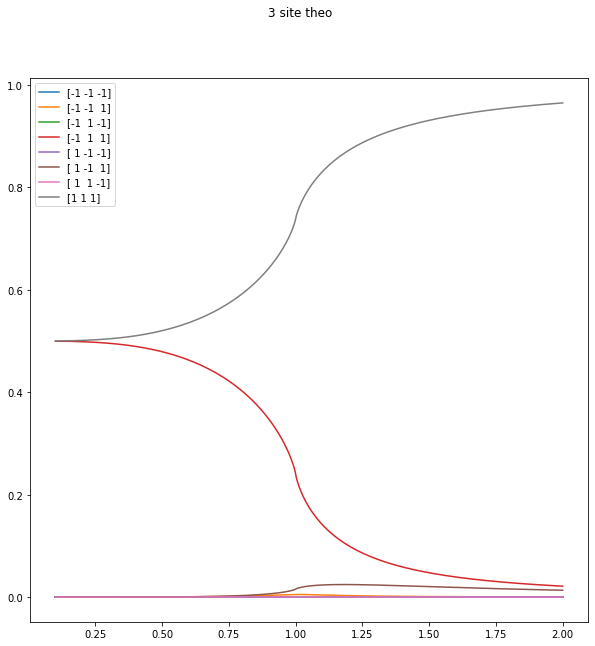

In [23]:
nus=autovals[:,L:]

figs, axs = plt.subplots(1,sharex=True,figsize=[10,10])

eigrho={}
signs={}
for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
    signarr=np.array(sign)
    signs[j]=signarr
    for i,row in enumerate(nus):
        rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
        eigrho[i,j]=np.prod(rowsign)
for k in range(2**L):
    temp_eigs=[]
    temp_eigs=[eigrho[x,k] for x in range(len(lambdarange))]
    axs.plot(lambdarange,temp_eigs,label=signs[k])
    axs.legend()
figs.suptitle("3 site theo")

Text(0.5, 0.98, '3 site theo')

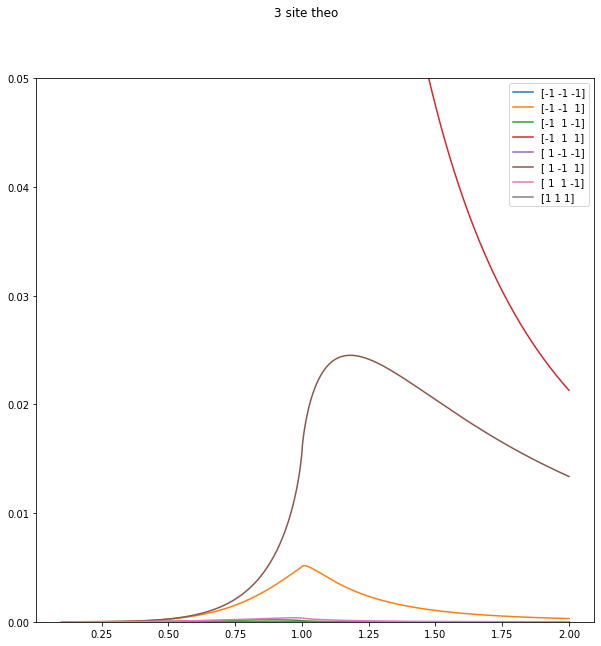

In [30]:
figs2,axs2= plt.subplots(1,sharex=True,figsize=[10,10])

for k in range(2**L):
    temp_eigs=[]
    temp_eigs=[eigrho[x,k] for x in range(len(lambdarange))]
    axs2.plot(lambdarange,temp_eigs,label=signs[k])
    plt.ylim(0,0.05)
    axs2.legend()
figs2.suptitle("3 site theo")